# Image preprocessing ([#8](https://github.com/molinari135/embryo-project/issues/8))

In this notebook, we perform the following operations:

1. Remove writings from the lower section of every image
2. Make every image squared again
3. Check the dynamic range of every image (for very dark images)

In order to perform all these operations it is **required** to run the previous notebook by number convention.

In [5]:
import cv2
from pathlib import Path
import numpy as np
from loguru import logger
import matplotlib.pyplot as plt
from embryo_project.config import INTERIM_DATA_DIR, FIGURES_DIR

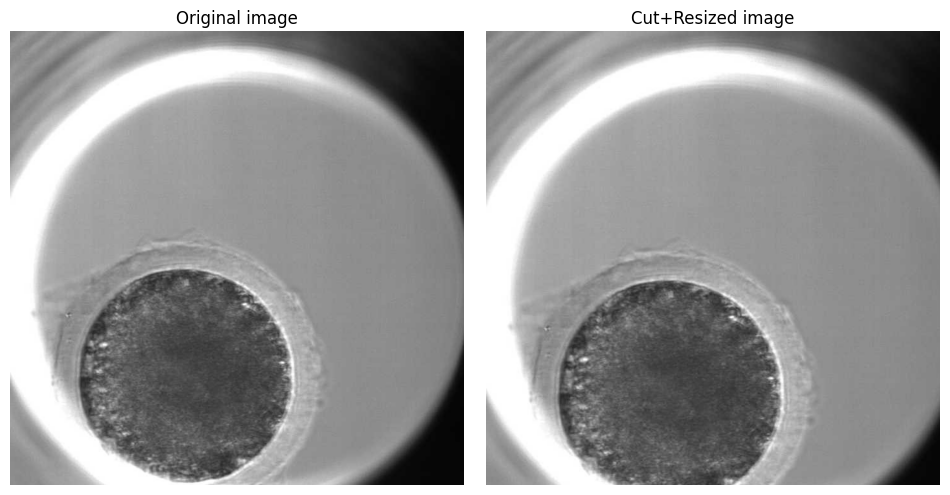

In [6]:
cut_bottom = 33

folders = sorted([f for f in INTERIM_DATA_DIR.iterdir() if f.is_dir()])
first_folder = folders[0]
image_files = sorted(list(first_folder.glob("*.JPG")))

first_image_path = image_files[0]
img = cv2.imread(str(first_image_path))

if img is None:
    logger.error("Error loading image")
else:
    h, w = img.shape[:2]

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_cropped = img[:h - cut_bottom, :, :]
    side = min(img_cropped.shape[:2])
    img_square = img_cropped[:side, :side]
    img_show = cv2.cvtColor(img_square, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(img_rgb)
    axs[0].set_title("Original image")
    axs[0].axis('off')

    axs[1].imshow(img_show)
    axs[1].set_title("Cut+Resized image")
    axs[1].axis('off')

    plt.subplots_adjust(wspace=0.05, hspace=0)
    plt.savefig(FIGURES_DIR / "3aa-cut-resized-image.png")
    plt.show()

In [7]:
# Now we perform this operation on all data/interim images
cut_bottom = 33
resize_dim = 256

for folder in sorted([f for f in INTERIM_DATA_DIR.iterdir() if f.is_dir()]):
    logger.info(f"Processing folder: {folder.name}")
    image_files = sorted(folder.glob("*.JPG"))
    
    for img_path in image_files:
        img = cv2.imread(str(img_path))
        if img is None:
            logger.error(f"Error loading image: {img_path}")
            continue
        
        h, w = img.shape[:2]
        img_cropped = img[:h - cut_bottom, :, :]
        side = min(img_cropped.shape[:2])
        img_square = img_cropped[:side, :side]
        img_resized = cv2.resize(img_square, (resize_dim, resize_dim))  # Suggested 256x256

        # Overwrite the images in data/interim
        cv2.imwrite(str(img_path), img_resized)
        
        logger.success(f"Processed and overwritten {img_path.name}, new size: {img_resized.shape[:2]}")

2025-08-05 13:49:14.876 | INFO     | __main__:<module>:6 - Processing folder: D2020.09.30_S00017_I4203_P_WELL01
2025-08-05 13:49:14.880 | SUCCESS  | __main__:<module>:24 - Processed and overwritten D2020.09.30_S00017_I4203_P_WELL01_RUN001.JPG, new size: (256, 256)
2025-08-05 13:49:14.882 | SUCCESS  | __main__:<module>:24 - Processed and overwritten D2020.09.30_S00017_I4203_P_WELL01_RUN044.JPG, new size: (256, 256)
2025-08-05 13:49:14.885 | SUCCESS  | __main__:<module>:24 - Processed and overwritten D2020.09.30_S00017_I4203_P_WELL01_RUN095.JPG, new size: (256, 256)
2025-08-05 13:49:14.888 | SUCCESS  | __main__:<module>:24 - Processed and overwritten D2020.09.30_S00017_I4203_P_WELL01_RUN145.JPG, new size: (256, 256)
2025-08-05 13:49:14.890 | SUCCESS  | __main__:<module>:24 - Processed and overwritten D2020.09.30_S00017_I4203_P_WELL01_RUN196.JPG, new size: (256, 256)
2025-08-05 13:49:14.892 | SUCCESS  | __main__:<module>:24 - Processed and overwritten D2020.09.30_S00017_I4203_P_WELL01_RUN

In [8]:
def is_too_dark(image_path, brightness_threshold=30):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        return False
    mean_brightness = np.mean(img)
    return mean_brightness < brightness_threshold

dark_images_count = 0
total_images = 0

for folder in INTERIM_DATA_DIR.iterdir():
    if folder.is_dir():
        for img_path in folder.glob("*.JPG"):
            total_images += 1
            if is_too_dark(img_path):
                dark_images_count += 1

logger.info(f"Total images: {total_images}")
logger.info(f"Too dark images: {dark_images_count} ({dark_images_count / total_images * 100:.2f}%)")

2025-08-05 13:50:34.717 | INFO     | __main__:<module>:18 - Total images: 22387
2025-08-05 13:50:34.717 | INFO     | __main__:<module>:19 - Too dark images: 38 (0.17%)
